In [2]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Access a public Github repos
!rm -rf /content/Brain-CT-Hemorrhage-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Brain-CT-Hemorrhage-Dataset.git

/content
Cloning into 'Brain-CT-Hemorrhage-Dataset'...
remote: Enumerating objects: 6760, done.
remote: Total 6760 (delta 0), reused 0 (delta 0), pack-reused 6760
Receiving objects: 100% (6760/6760), 125.66 MiB | 29.32 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Updating files: 100% (7696/7696), done.


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [5]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [6]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Brain-CT-Hemorrhage-Dataset"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  DataSetSummary(local_path, 0)
  local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: Hemorrhagic, Số tệp: 1
	Tổng số thư mục: 1
	-Thư mục: KANAMA, Số tệp: 18
		Tổng số thư mục: 18
		-Thư mục: 9[9], Số tệp: 123
		-Thư mục: 20[20]_2, Số tệp: 123
		-Thư mục: 12[12], Số tệp: 203
		-Thư mục: 8[8], Số tệp: 138
		-Thư mục: 3[3], Số tệp: 82
		-Thư mục: 11[11], Số tệp: 204
		-Thư mục: 2[2], Số tệp: 170
		-Thư mục: 5[5], Số tệp: 127
		-Thư mục: 19[19], Số tệp: 23
		-Thư mục: 7[7], Số tệp: 134
		-Thư mục: 21[21] _2, Số tệp: 45
		-Thư mục: 17[17]__, Số tệp: 195
		-Thư mục: 14[14], Số tệp: 130
		-Thư mục: 13[13], Số tệp: 221
		-Thư mục: 15[15], Số tệp: 196
		-Thư mục: 6[6], Số tệp: 132
		-Thư mục: 1[1], Số tệp: 212
		-Thư mục: 4[4], Số tệp: 232
-Thư mục: NORMAL, Số tệp: 27
	Tổng số thư mục: 27
	-Thư mục: N3[N3], Số tệp: 360
	-Thư mục: N12[N12], Số tệp: 130
	-Thư mục: N4[N4], Số tệp: 126
	-Thư mục: N26[N26], Số tệp: 129
	-Thư mục: N21[N21], Số tệp: 131
	-Thư mục: N23[N23], Số tệp: 134
	-Thư mục: N13[N13], Số tệp: 128
	-Thư mục: N15[N15], Số tệp: 132
	-Th

In [7]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-CT-Hemorrhage-Dataset

/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-CT-Hemorrhage-Dataset


In [8]:
# Set the path to your dataset
dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/sample'
# dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/dataset'

In [9]:
import os

def list_dirs_recursively(path, seen=None):
    if seen is None:
        seen = set()

    for dirpath, dirnames, filenames in os.walk(path):
        if dirpath not in seen:
            print(f'{dirpath}')
            seen.add(dirpath)
            for dirname in dirnames:
                list_dirs_recursively(os.path.join(dirpath, dirname), seen)

dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/dataset'
list_dirs_recursively(dataset_path)

/content/Brain-CT-Hemorrhage-Dataset/dataset
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/9[9]
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/20[20]_2
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/12[12]
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/8[8]
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/3[3]
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/11[11]
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/2[2]
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/5[5]
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/19[19]
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/7[7]
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/21[21] _2
/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KAN

In [10]:
class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA')
imshow(images, 10)


Output hidden; open in https://colab.research.google.com to view.

In [11]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
print('images.keys:', images.keys())
image_path = "/content/Brain-CT-Hemorrhage-Dataset/dataset/Hemorrhagic/KANAMA/11[11]/11_0_0.jpg"
# print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['9[9]', '20[20]_2', '12[12]', '8[8]', '3[3]', '11[11]', '2[2]', '5[5]', '19[19]', '7[7]', '21[21] _2', '17[17]__', '14[14]', '13[13]', '15[15]', '6[6]', '1[1]', '4[4]'])
Image Format: JPEG
Image Mode: RGB
Image Size: (512, 512) pixels (Width: 512, Height: 512)
Image Colors: [(8111, (255, 255, 255)), (356, (253, 253, 253)), (305, (251, 251, 251)), (254, (249, 249, 249)), (220, (247, 247, 247)), (168, (245, 245, 245)), (133, (243, 243, 243)), (130, (241, 241, 241)), (108, (239, 239, 239)), (108, (237, 237, 237)), (77, (235, 235, 235)), (96, (233, 233, 233)), (87, (231, 231, 231)), (81, (229, 229, 229)), (92, (227, 227, 227)), (93, (225, 225, 225)), (76, (223, 223, 223)), (79, (221, 221, 221)), (102, (219, 219, 219)), (107, (217, 217, 217)), (120, (215, 215, 215)), (108, (213, 213, 213)), (141, (211, 211, 211)), (126, (209, 209, 209)), (150, (207, 207, 207)), (172, (205, 205, 205)), (164, (203, 203, 203)), (190, (201, 201, 201)), (236, (199, 199, 199)), (245, (197,

## Unsharpmasking

In [12]:
import pywt
def preprocess_func(image):
    # Unsharp Masking
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

    # Bilateral Filter Denoising
    denoised_image = cv2.bilateralFilter(unsharp_mask, d=9, sigmaColor=75, sigmaSpace=75)

    # return result
    return denoised_image

In [13]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, os.path.join(dest_dir, item), preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                # Define the output file path
                filename_with_ext = os.path.basename(src_item_path)
                filename, extension = os.path.splitext(filename_with_ext)
                dest_item_path = os.path.join(dest_dir, filename + '.jpg')

                # Check if output file already exists
                if not os.path.exists(dest_item_path):
                    img = cv2.imread(src_item_path)
                    if img is not None:
                        img = preprocess_func(img)

                        # Export the preprocessed image to the output folder
                        cv2.imwrite(dest_item_path, img)

In [14]:
# Usage:
# dataset_path = '/content/Osteoporosis-Knee-Xray-Dataset/sample'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Osteoporosis-Knee-Xray-Dataset/CLAHE_medianF3x3_sample'
dataset_path = '/content/Brain-CT-Hemorrhage-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/06_08_USM'
preprocess_and_copy(dataset_path, output_path, preprocess_func)


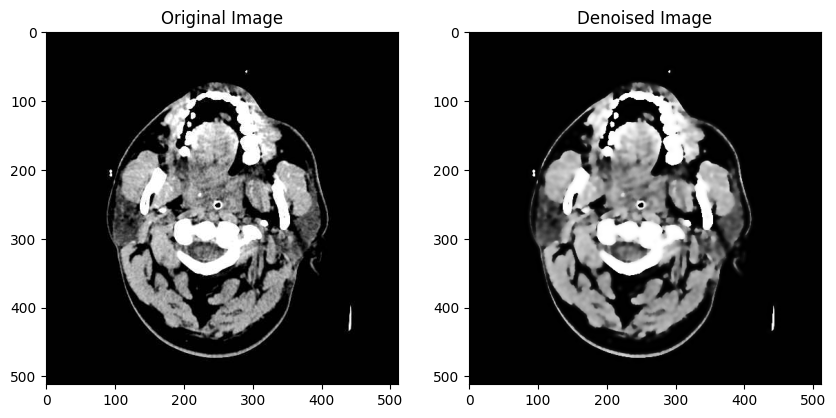

In [15]:
import cv2
import numpy as np
import pywt
# Đọc ảnh cần xử lý
image_path = '/content/Brain-CT-Hemorrhage-Dataset/sample/Hemorrhagic/KANAMA/11[11]/11_0_0.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng biến đổi sóng và lọc nhiễu cho ảnh
denoised_image = preprocess_func(img)


# Hiển thị ảnh gốc và ảnh đã xử lý bằng Matplotlib
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Ảnh đã xử lý
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()